<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic18/3_Grokking_DL_hfst5_no_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

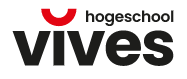<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# CHAPTER 5: LEARNING MULTIPLE WEIGHTS AT A TIME - GENERALIZING GRADIENT DESCENT

Hoofstuk 5 (pag 79-98) uit het boek "grokking Deep Learning" van Andrew W. Trask.

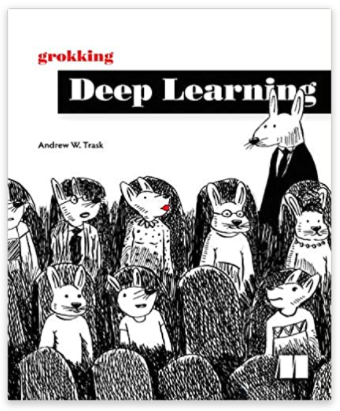

## Gradient descent learning with multiple inputs

boek pag 80 ev

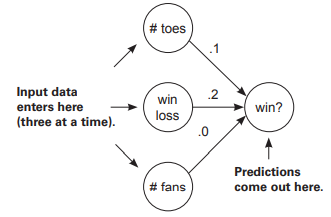

**Herhaling**: het model is hier gelijk aan:

> $y = w_1x_1 + w_2x_2 + w_3x_3$

Meestal schrijft men dat met een sommatieteken:

> $y = \sum_{j=1}^{3} w_jx_j$

Dit noemt men een gewogen som (weighted sum) of inwendig product of scalair product

**Nieuw**: We gaan nu ook de squared error berekenen en de 3 gewichten aanpassen aan de hand van de gradiënt.

In [ ]:
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

def neural_network(input, weights):
    prediction = weighted_sum(input, weights)
    return prediction

def squared_error(goal, prediction):
    error = (prediction - goal) ** 2
    return error

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
labels = [1, 1, 0, 1]

input = [toes[0], win_loss[0], nfans[0]]
weights = [0.1, 0.2, 0]

prediction = neural_network(input, weights)  # enkel eerste datapunt
error = squared_error(goal=labels[0], prediction=prediction)

print("prediction:", prediction)
print("squared error:", error)

prediction: 0.9800000000000001
squared error: 0.0003999999999999963


In [ ]:
def element_mult(number, vector):  # elementwise multiplication
    output = []
    for element in vector:
        output.append(number * element)
    return output

def adapt_weights(input, label, weights, alpha=0.01):
    prediction = neural_network(input, weights)  # voorspelling (predict)
    delta = prediction - label  # verschil tussen voorspelling en label (compare)
    weight_deltas = element_mult(delta, input)  # gradient: delta * input (compare)
    weights = weights.copy()  # copy maken
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]  # nieuwe weights: learning_rate * gradient aftrekken (learn)
    return weights

In [ ]:
adapt_weights(input, labels[0], weights)

[0.1017, 0.20013, 0.00023999999999999887]

**Opdracht**: Overloop nu de 4 datapunten en pas de gewichten achtereenvolgens aan. Wat is je uiteindelijke voorspelling en fout?

**Opdracht**: Schrijf alle code opnieuw (inclusief de gegeven functies) en maak deze keer gebruik van NumPy arrays en gevectoriseerde expressies.

**Uitdaging**: Probeer nu met behulp van matrixbewerkingen de gewichten in één keer aan te passen. Je gaat dus niet de datapunten één voor één overlopen, maar neemt alle datapunten samen (= een **batch**) om de gewichten aan te passen. Dit is de zogenaamde **Batch Gradient Descent**. Hieronder zie je de oplossing uitgewerkt in Excel.

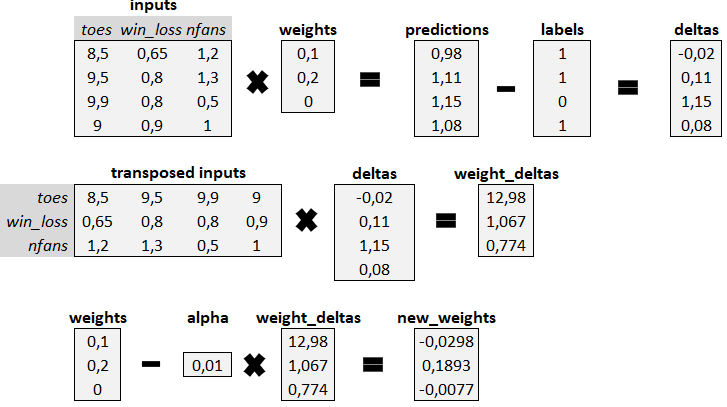

Bereken ook de **Mean Squared Error** (MSE).

## Let's watch several steps of learning

boek pag 86 ev

Functie om error vs weight te plotten (zie hfst4)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_error_function(input, goal, weights, iweight, weight_limits, slope_limits, axes=None):
    # iweight is index of target weight

    # check axes
    if axes is None:
        _, axes = plt.subplots()

    # indices of other weights
    ids = np.delete(np.arange(len(input)), iweight)

    # minimum error: gradient = 0, and in this case, error = 0
    min_weight = (goal - np.sum(input[ids] * weights[ids])) / input[iweight]

    # error function
    weights_plot = min_weight + np.linspace(weight_limits[0], weight_limits[1], 100)
    predictions = input[iweight] * weights_plot + np.sum(input[ids] * weights[ids])
    errors = np.square(predictions - goal)
    axes.plot(weights_plot, errors, 'k-');

    # plot minimum
    axes.plot(min_weight, 0, 'ro', markersize=10);

    # (weight, error) point
    prediction = np.sum(input * weights)
    error = np.square(prediction - goal)
    axes.plot(weights[iweight], error, 'ko', markersize=10);

    # tangent (slope)
    gradient = 2 * (prediction - goal) * input[iweight]
    y = lambda x: error + gradient * (x - weights[iweight])
    x = weights[iweight] + np.array(slope_limits)
    axes.plot(x, y(x), 'k:');

    # labels
    axes.set_xlabel('weight')
    axes.set_ylabel('error')
    axes.set_title(f"slope = {gradient:.2f}")

We nemen het eerste datapunt en passen de gewichten 3 keer achtereenvolgens aan. Het label van dat datapunt wijzigen we in 0 en de learning rate maken we kleiner (0.005) om straks de plots duidelijker te maken.

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
labels = [0, 1, 0, 1]

weights = np.array([0.1, 0.2, 0])
alpha = 0.005

i = 0  # eerste datapunt
input = np.array([toes[i], win_loss[i], nfans[i]])
niter = 3  # aantal iteraties
for n in range(niter):
    prediction = np.dot(input, weights)  # predict
    error = np.square(labels[i] - prediction)  # compare
    weights -= alpha * (prediction - labels[i]) * input  # learn
    print("Iteration", n + 1)
    print("\tprediction:", prediction)
    print("\tsquared error:", error)
    print("\tweights:", weights)

Iteration 1
	prediction: 0.9800000000000001
	squared error: 0.9604000000000001
	weights: [ 0.05835   0.196815 -0.00588 ]
Iteration 2
	prediction: 0.6168487500000001
	squared error: 0.3805023803765626
	weights: [ 0.03213393  0.19481024 -0.00958109]
Iteration 3
	prediction: 0.388267735078125
	squared error: 0.15075183410269707
	weights: [ 0.01563255  0.19354837 -0.0119107 ]


We maken 4 x 3 plots: 1 voor elk van de 4 iteraties (de initialisatie meegerekend) en voor elk van de 3 gewichten. Omdat er 3 gewichten zijn, gaat het hier om een 4D oppervlak. De grafieken zijn 2D doorsneden.

[ 0.05835   0.196815 -0.00588 ]
[ 0.03213393  0.19481024 -0.00958109]
[ 0.01563255  0.19354837 -0.0119107 ]


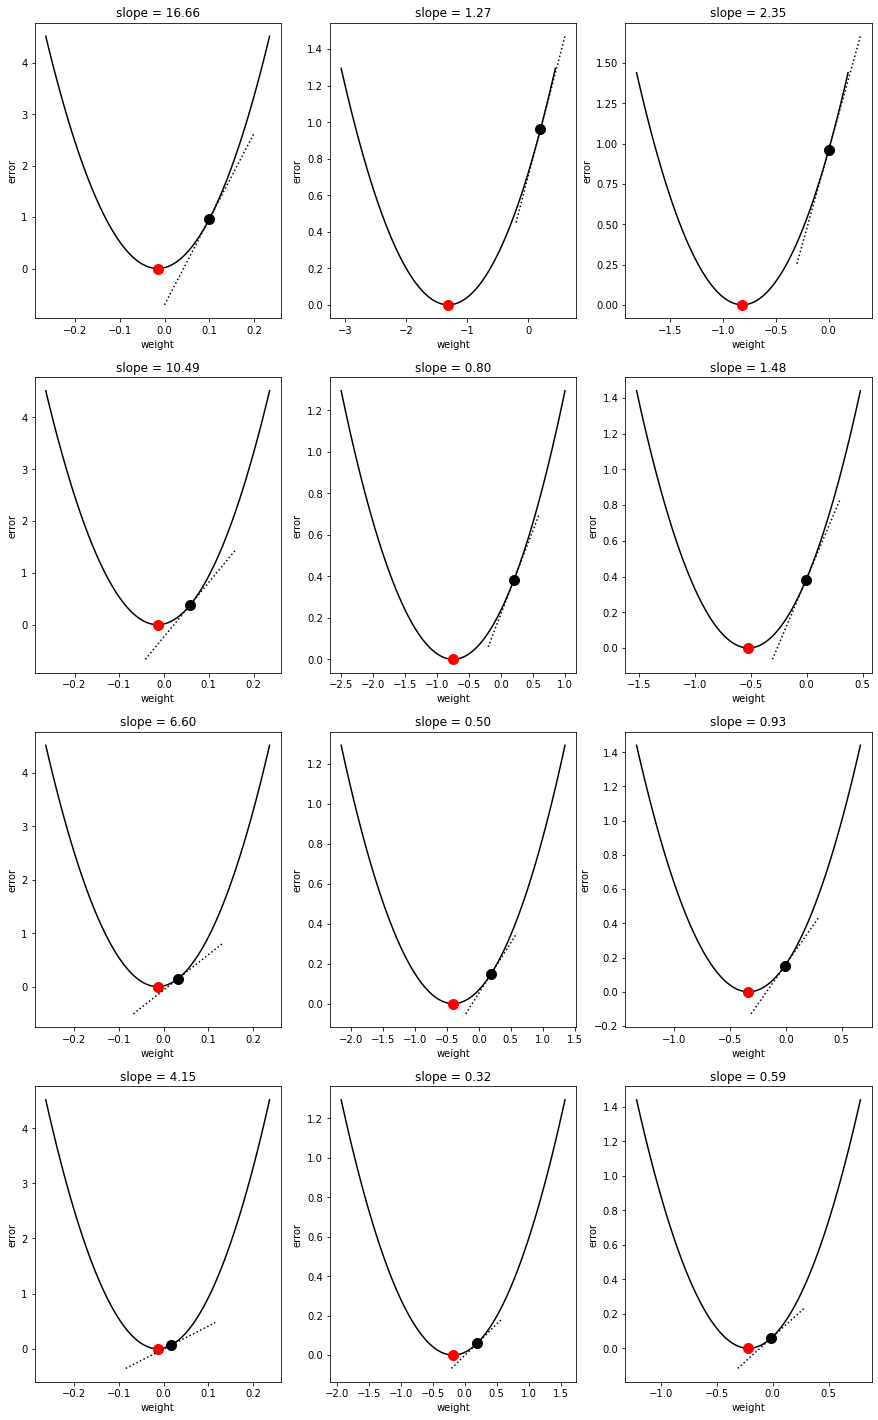

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
labels = [0, 1, 0, 1]

weights = np.array([0.1, 0.2, 0])
alpha = 0.005

i = 0  # eerste datapunt
niter = 3

fig, axes = plt.subplots(4, 3)
fig.set_figwidth(15)
fig.set_figheight(25)

weight_limits = ([-0.25, 0.25], [-1.75, 1.75], [-1, 1])
slope_limits = ([-0.1, 0.1], [-0.4, 0.4], [-0.3, 0.3])

input = np.array([toes[i], win_loss[i], nfans[i]])
for j in range(len(weights)):
    plot_error_function(input, labels[i], weights, j, weight_limits=weight_limits[j],
                        slope_limits=slope_limits[j], axes=axes[0, j])

for n in range(niter):
    prediction = np.dot(input, weights)  # predict
    error = np.square(labels[i] - prediction)  # compare
    weights -= alpha * (prediction - labels[i]) * input  # learn
    print(weights)
    for j in range(len(weights)):
        plot_error_function(input, labels[i], weights, j, weight_limits=weight_limits[j],
                            slope_limits=slope_limits[j], axes=axes[n + 1, j])

We zien dat het eerste gewicht het meest wordt aangepast. Dat is omdat de overeenkomstige input (#toes) de grootste waarde heeft. Dat is niet noodzakelijk een voordeel, en bij een (veel) grotere learning rate zouden we zelfs divergentie krijgen. Probeer dat maar eens uit. Nu begrijp je ook waarom het belangrijk is om input te **herschalen**, te **standaardiseren** of te **normaliseren**.

## Freezing one weight: What does it do?

boek pag 88 ev

We gaan het eerste gewicht niet aanpassen of "bevriezen" om te zien wat dat voor resultaat geeft. Dat doen we door een learning rate voor elk gewicht te definiëren en de eerste gelijk aan nul te stellen. De andere alfa's (met overeenkomstig kleinere inputs) maken we groter om de plots duidelijker te maken.  

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
labels = [0, 1, 0, 1]

weights = np.array([0.1, 0.2, 0])
alpha = np.array([0.0, 0.3, 0.3])  # alpha[0] op nul zetten om eerste gewicht niet aan te passen

i = 0  # eerste datapunt
input = np.array([toes[i], win_loss[i], nfans[i]])
niter = 3  # aantal iteraties
for n in range(niter):
    prediction = np.dot(input, weights)  # predict
    error = np.square(labels[i] - prediction)  # compare
    weights -= alpha * (prediction - labels[i]) * input  # learn
    print("Iteration", n + 1)
    print("\tprediction:", prediction)
    print("\tsquared error:", error)
    print("\tweights:", weights)

Iteration 1
	prediction: 0.9800000000000001
	squared error: 0.9604000000000001
	weights: [ 0.1     0.0089 -0.3528]
Iteration 2
	prediction: 0.43242500000000006
	squared error: 0.18699138062500006
	weights: [ 0.1        -0.07542288 -0.508473  ]
Iteration 3
	prediction: 0.19080753125000002
	squared error: 0.036407513981719736
	weights: [ 0.1        -0.11263034 -0.57716371]


Laten we nu opnieuw de 4 x 3 grafieken plotten:

[ 0.1     0.0089 -0.3528]
[ 0.1        -0.07542288 -0.508473  ]
[ 0.1        -0.11263034 -0.57716371]


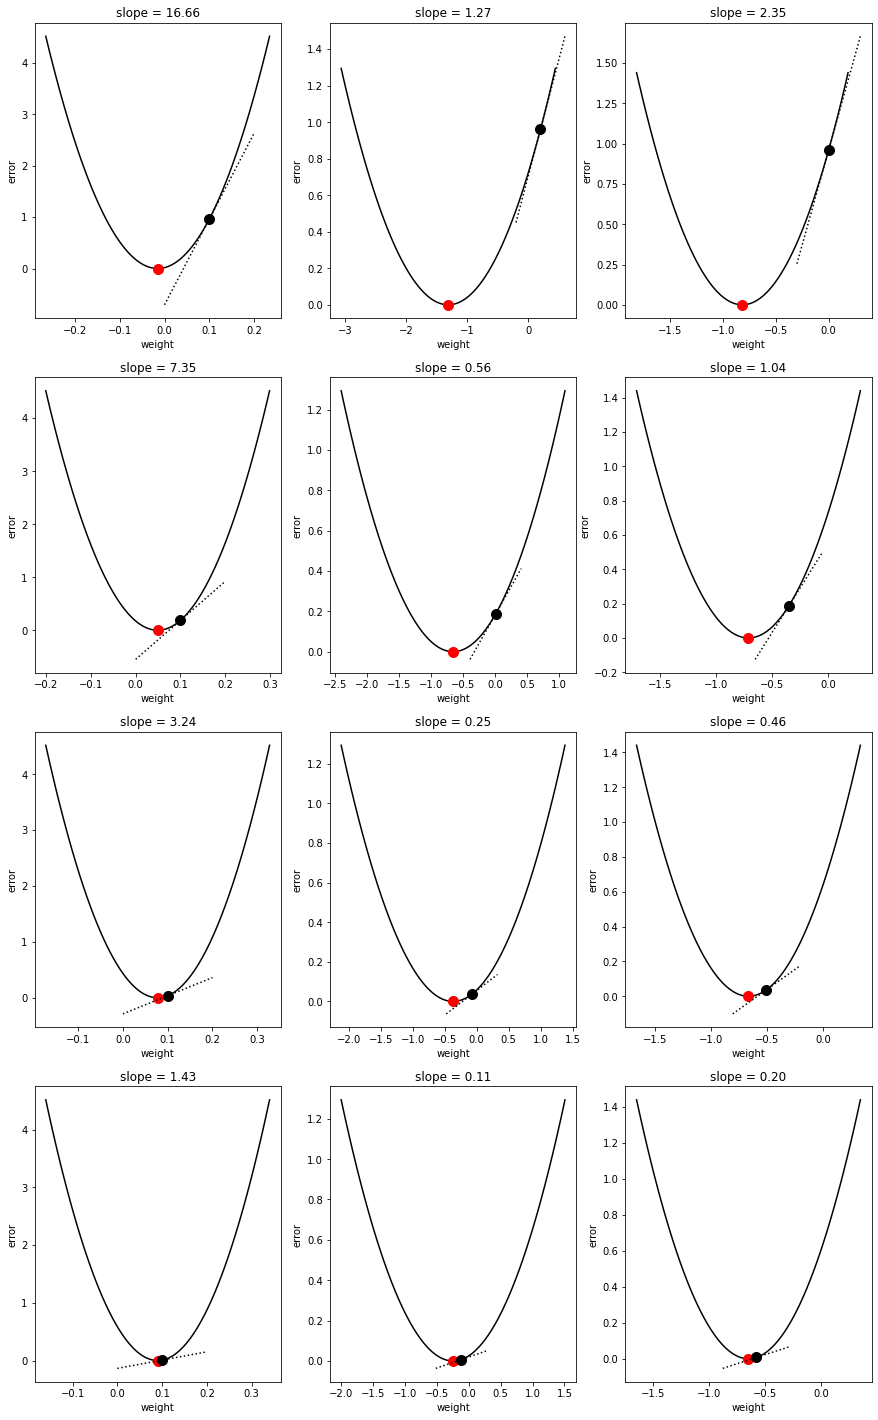

In [ ]:
toes = [8.5, 9.5, 9.9, 9.0]
win_loss = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
labels = [0, 1, 0, 1]

weights = np.array([0.1, 0.2, 0])
alpha = np.array([0.0, 0.3, 0.3])  # alpha[0] op nul zetten om eerste gewicht niet aan te passen

i = 0  # eerste datapunt
niter = 3

fig, axes = plt.subplots(4, 3)
fig.set_figwidth(15)
fig.set_figheight(25)

weight_limits = ([-0.25, 0.25], [-1.75, 1.75], [-1, 1])
slope_limits = ([-0.1, 0.1], [-0.4, 0.4], [-0.3, 0.3])

input = np.array([toes[i], win_loss[i], nfans[i]])
for j in range(len(weights)):
    plot_error_function(input, labels[i], weights, j, weight_limits=weight_limits[j],
                        slope_limits=slope_limits[j], axes=axes[0, j])

for n in range(niter):
    prediction = np.dot(input, weights)  # predict
    error = np.square(labels[i] - prediction)  # compare
    weights -= alpha * (prediction - labels[i]) * input  # learn
    print(weights)
    for j in range(len(weights)):
        plot_error_function(input, labels[i], weights, j, weight_limits=weight_limits[j],
                            slope_limits=slope_limits[j], axes=axes[n + 1, j])

Wat zien we? Ook al wordt het eerste gewicht niet aangepast, toch komt ook in de eerste grafieken het punt dichter bij het minimum. Dat komt omdat het hier om een 4D oppervlak gaat en de figuren 2D doorsneden zijn. We noemen het 4D oppervlak de "**error plane**". Doordat het punt dichter van het minimum nadert door het aanpassen van de 2 laatste gewichten, komt het ook dichter op een doorsnede thv het eerste gewicht: het gewicht blijft inderdaad 0.1, maar de curve schuift op! M.a.w. we krijgen steeds een nieuwe doorsnede die dichter van het gezochte minimum ligt.

Dit illustreert een potentieel probleem bij neurale netwerken: ook al bevat de eerste input nuttige informatie, het neuraal netwerk kan een manier vinden om toch een minimum te vinden zonder te "leren" uit die relevante informatie.

## Gradient descent learning with multiple outputs

boek pag 90 ev

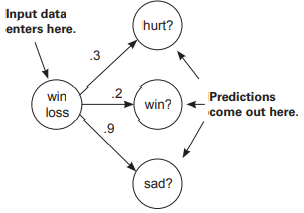

**Herhaling**: Het model is hier gelijk aan:

> $\begin{cases} y_1 = w_1x \\ y_2 = w_2x \\ y_3 = w_3x \end{cases}$

Of gebruik makend van indexvariabele $i$:

> $y_i = w_ix \mbox{  met i = 1, 2, 3}$

Hiervoor moeten we overeenkomstige elementen van 2 arrays vermenigvuldigen

**Nieuw**: We gaan nu ook de squared error berekenen en de 3 gewichten aanpassen aan de hand van de gradiënt.

In [ ]:
def element_mult(number, vector):  # elementwise multiplication
    output = []
    for element in vector:
        output.append(number * element)
    return output

def neural_network(input, weights):
    prediction = element_mult(input, weights)
    return prediction

def squared_error(labels, predictions):
    errors = []
    for i in range(len(labels)):
        errors.append((predictions[i] - labels[i]) ** 2)
    return errors

In [ ]:
# gewichten
weights = [0.3, 0.2, 0.9]

# input
win_loss = [0.65, 0.8, 0.8, 0.9]

# labels
hurt = [0.1, 0.0, 0.0, 0.1]  # hoeveel % van de spelers is geblesseerd na de match?
win = [1, 1, 0, 1]           # match gewonnen?
sad = [0.1, 0.0, 0.1, 0.2]   # hoeveel % van de spelers is niet blij na de match?

predictions = neural_network(win_loss[0], weights)  # enkel eerste datapunt
errors = squared_error([hurt[0], win[0], sad[0]], predictions)

print(predictions)
print(errors)

[0.195, 0.13, 0.5850000000000001]
[0.009025, 0.7569, 0.2352250000000001]


In [ ]:
def adapt_weights(input, labels, weights, alpha=0.01):
    predictions = neural_network(input, weights)  # voorspelling (predict)
    deltas = []
    for i in range(len(labels)):
        deltas.append(predictions[i] - labels[i])  # verschil tussen voorspelling en label (compare)
    weight_deltas = element_mult(input, deltas)  # gradient: delta * input (compare)
    weights = weights.copy()  # copy maken
    for i in range(len(weights)):
        weights[i] -= alpha * weight_deltas[i]  # nieuwe weights: learning_rate * gradient aftrekken (learn)
    return weights

In [ ]:
adapt_weights(win_loss[0], [hurt[0], win[0], sad[0]], weights)  # enkel eerste datapunt

[0.2993825, 0.205655, 0.8968475]

**Opdracht**: Overloop nu de 4 datapunten en pas de gewichten achtereenvolgens aan. Wat zijn je uiteindelijke voorspellingen en fouten?

**Opdracht**: Schrijf alle code opnieuw (inclusief de gegeven functies) en maak deze keer gebruik van NumPy arrays en gevectoriseerde expressies.

**Uitdaging**: Probeer ook hier met behulp van matrixbewerkingen de gewichten in één keer aan te passen door alle datapunten samen te nemen in één **batch**. Hieronder zie je de oplossing uitgewerkt in Excel. Bereken ook de **Mean Squared Error** (MSE).

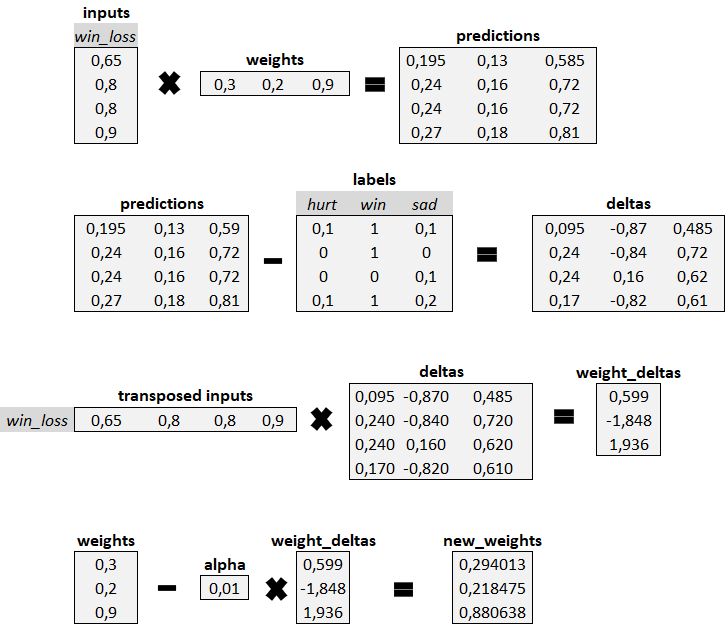

## Gradient descent learning with multiple inputs and outputs

boek pag 92 ev

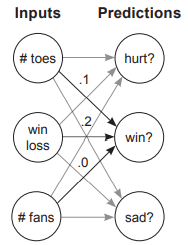

**Herhaling**: Het model is hier gelijk aan:

> $\begin{cases} y_1 = w_{11}x_1 + w_{12}x_2 + w_{13}x_3 \\
y_2 = w_{21}x_1 + w_{22}x_2 + w_{23}x_3 \\
y_3 = w_{31}x_1 + w_{32}x_2 + w_{33}x_3 \end{cases}$

Of gebruik makend van indexvariabelen $i$ en $j$:

> $y_i = \sum_{j=1}^3w_{ij}x_j \mbox{  met i= 1, 2, 3}$

Hiervoor moeten we dus de gewogen som berekenen van een rij uit de matrix met gewichten en de vector met features

**Nieuw**: We gaan nu ook de squared error berekenen en de 9 gewichten aanpassen aan de hand van de gradiënt.

In [ ]:
# gewogen som
def weighted_sum(a, b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += a[i] * b[i]
    return output

# gewogen som van elke rij van een matrix met een vector
def vector_matrix_mult(vector, matrix):
    assert(len(vector) == len(matrix))  # lengte vector = aantal matrix rijen
    output = []
    for row in matrix:
        output.append(weighted_sum(vector, row))
    return output

def neural_network(inputs, weights):
    prediction = vector_matrix_mult(inputs, weights)
    return prediction

def squared_error(labels, predictions):
    errors = []
    for i in range(len(labels)):
        errors.append((predictions[i] - labels[i]) ** 2)
    return errors

In [ ]:
# input data
toes = [8.5, 9.5, 9.9, 9.0]       # gemiddeld aantal tenen van de spelers
win_loss = [0.65, 0.8, 0.8, 0.9]  # percentage gewonnen wedstrijden
nfans = [1.2, 1.3, 0.5, 1.0]      # aantal fans (x 10000)

# labels
hurt = [0.1, 0.0, 0.0, 0.1]  # hoeveel % van de spelers is geblesseerd na de match?
win = [1, 1, 0, 1]           # match gewonnen?
sad = [0.1, 0.0, 0.1, 0.2]   # hoeveel % van de spelers is niet blij na de match?

# gewichten
weights = [[0.1, 0.1, -0.3], # hurt?
           [0.1, 0.2, 0.0],  # win?
           [0.0, 1.3, 0.1]]  # sad?

predictions = neural_network([toes[0], win_loss[0], nfans[0]], weights)  # enkel eerste datapunt
errors = squared_error([hurt[0], win[0], sad[0]], predictions)

print(predictions)
print(errors)

[0.555, 0.9800000000000001, 0.9650000000000001]
[0.20702500000000007, 0.0003999999999999963, 0.7482250000000001]


Voor het aanpassen van de gewichten moeten we het **uitwendig product** berekenen tussen de vector met inputs en de vector met deltas.

Algemeen is het uitwendig product tussen vector `v1` van lengte `m` en vector `v2` van lengte `n` een `m` x `n` matrix met element `[i, j]` gelijk aan `v1[i] * v2[j]`. Bijvoorbeeld:

In [ ]:
v1 = [1, 2, 3]
v2 = [1, 2, 3, 4]
m = np.zeros((3, 4))
for i in range(3):
    for j in range(4):
        m[i, j] = v1[i] * v2[j]
m

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  4.,  6.,  8.],
       [ 3.,  6.,  9., 12.]])

Uiteraard bestaat er een ingebouwde functie `outer` in NumPy:

In [ ]:
np.outer(v1, v2)

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12]])

Let op! De volgorde van de vectoren is belangrijk!

In [ ]:
np.outer(v2, v1)

array([[ 1,  2,  3],
       [ 2,  4,  6],
       [ 3,  6,  9],
       [ 4,  8, 12]])

De code uit het boek om de gewichten aan te passen:

In [ ]:
# outer product tussen 2 vectoren
def outer_product(vector1, vector2):
    out = []
    for i in range(len(vector1)):
        out.append([])
        for j in range(len(vector2)):
            out[i].append(vector1[i] * vector2[j])
    return out

from copy import deepcopy

def adapt_weights(inputs, labels, weights, alpha=0.01):
    predictions = neural_network(inputs, weights)  # voorspelling (predict)
    deltas = []
    for i in range(len(labels)):
        deltas.append(predictions[i] - labels[i])  # verschil tussen voorspelling en label (compare)
    weight_deltas = outer_product(inputs, deltas)  # gradient: delta * input (compare)
    weights = deepcopy(weights)  # deep copy maken! want lists in list!
    for i in range(len(weights)):
        for j in range(len(weights[i])):
            weights[i][j] -= alpha * weight_deltas[i][j]  # nieuwe weights: learning_rate * gradient aftrekken (learn)
    return weights

In [ ]:
adapt_weights(inputs=[toes[0], win_loss[0], nfans[0]],
              labels=[hurt[0], win[0], sad[0]], weights=weights)  # enkel eerste datapunt

[[0.061325, 0.1017, -0.373525],
 [0.0970425, 0.20013, -0.005622500000000002],
 [-0.0054600000000000004, 1.30024, 0.08962]]

**Opdracht**: Overloop nu de 4 datapunten en pas de gewichten achtereenvolgens aan. Wat zijn je uiteindelijke voorspellingen en fouten?

**Opdracht**: Schrijf alle code opnieuw (inclusief de gegeven functies) en maak deze keer gebruik van NumPy arrays en gevectoriseerde expressies.

**Uitdaging**: Lukt het ook in dit geval om de gewichten in één keer aan te passen door alle datapunten samen te nemen in één **batch**? Hieronder zie je de oplossing uitgewerkt in Excel. Bereken ook de **Mean Squared Error** (MSE).

Eerst de predicties en deltas berekenen:

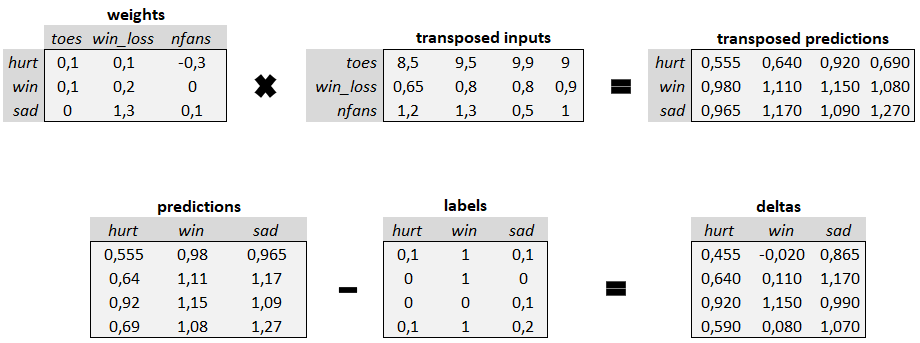

Dan de `weigh_deltas` voor elk datapunt berekenen mbv het uitwendig product (voorgesteld door een maalteken met een cirkel rond)

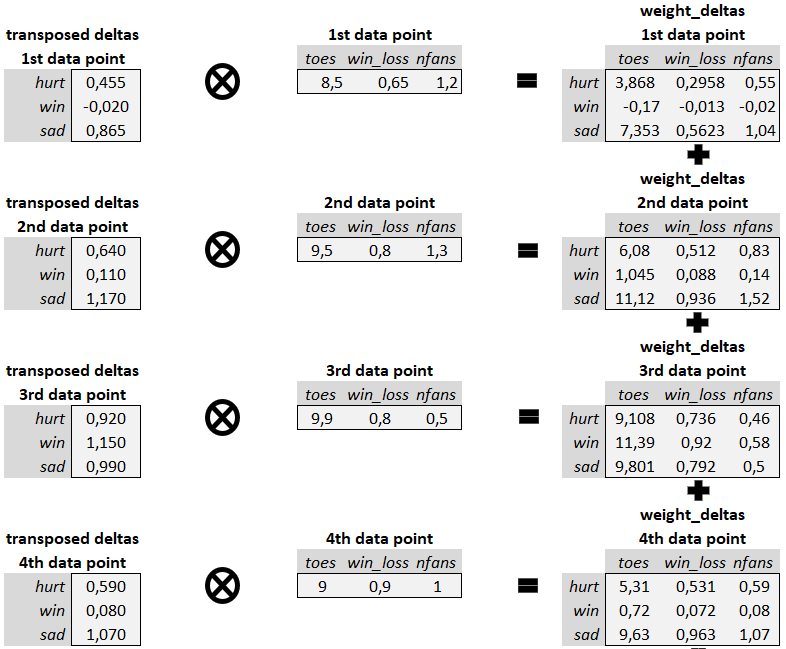

Tenslotte de som nemen van alle `weight_delta` matrices en hiermee de nieuwe gewichten berekenen:

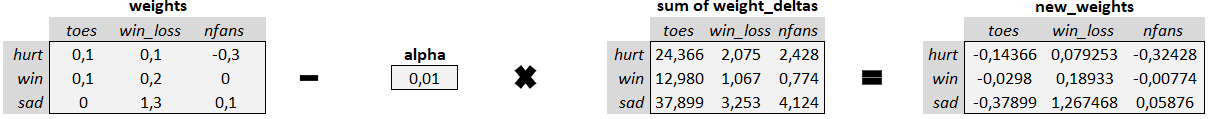

## What do these weights learn?

boek pag 94 ev

Neem als voorbeeld de MNIST dataset met zwart-wit images van handgeschreven cijfers. Elke image heeft 28 x 28 pixels. Die gaan we achter elkaar plaatsen ("flatten") zodat we 784 inputs krijgen. De output bestaat uit 10 kansen: 1 kans voor elke cijfer van 0 tem 9. We hebben dus een neuraal netwerk nodig met multiple inputs, nl. 784, en multiple outputs, nl. 10. Hieronder zie je een neuraal netwerk afgebeeld zonder tussenlagen zoals we in de vorige paragraaf hebben gezien die 784 x 10 gewichten bevat en voor elke image zou kunnen voorspellen wat de kans is dat het een bepaald cijfer is. Het model **trainen** betekent dat we achtereenvolgens de gewichten gaan aanpassen tot de totale fout (of de loss functie) minimaal is.

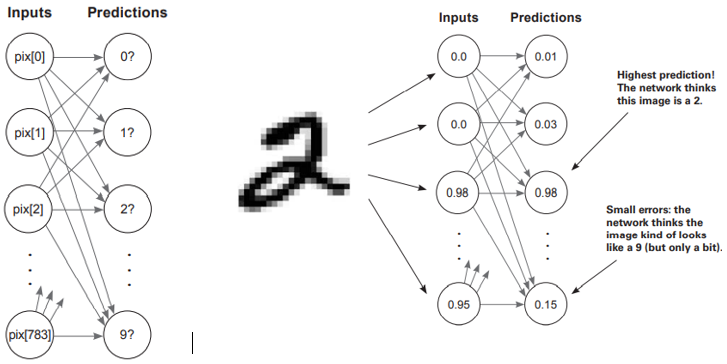

Uiteraard hebben we ondertussen al gezien dat er betere modellen bestaan dan dit eenvoudige model om zeer nauwkeurige voorspellingen te krijgen: modellen met verborgen tussenlagen, en nog beter, een convolutioneel netwerk (convnet).

## Visualizing weight values

boek pag 96 ev

Deep learning onderzoekers gaan vaak de gewichten visualiseren alsof het images zijn om zo meer inzicht te krijgen in de (interne) werking van neurale netwerken.

Elke output node heeft een gewicht dat overeenkomt met een pixel in de input images. Je hebt dus in het voorbeeld van de MNIST dataset voor elke output 784 gewichten die je eveneens kan voorstellen als 28 x 28 images. Wanneer het gewicht van een bepaalde pixel hoog is, dan is er een sterke **correlatie** tussen de output node en die pixel; is het gewicht laag, dan is er een zwakke correlatie. Op de figuur zie je bijvoorbeeld de gewichten gevisualiseerd voor het getal 2 (links) en het getal 1 (rechts): lichte kleuren geven een hoge (positieve) waarde, donkere kleuren een lage (negatieve) waarde, en rode pixels komen overeen met gewichten die rond nul liggen.

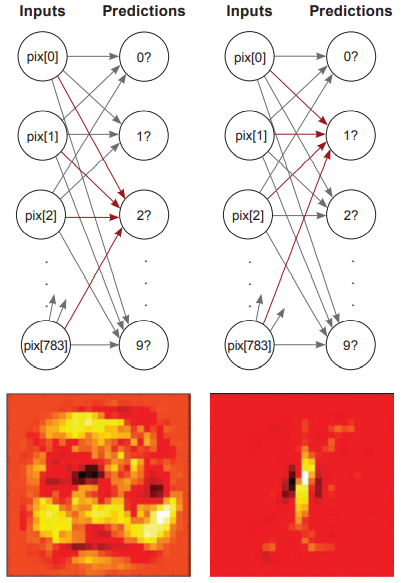

Herinner je dat de voorspellingen werden berekend mbv een **dot-product**. Welnu, een dot-product kunnen we interpreteren als een maat voor de gelijkenis tussen twee vectoren. Dit wordt geillustreerd in de figuur hieronder.

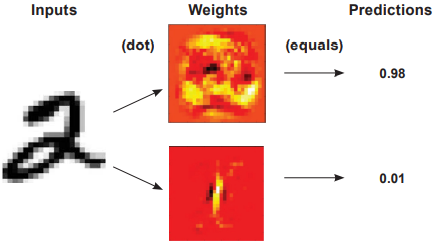

---